In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [31]:
d_e = pd.read_csv('e6400000_0_01_2000.txt', sep=' ')
d_e1 = pd.read_csv('e6400000_0_01_500.txt', sep=' ')
d_e05 = pd.read_csv('e6400000_0_05_2000.txt', sep=' ')
d_e001 = pd.read_csv('e6400000_0_001_2000.txt', sep=' ')

d_h = pd.read_csv('h6400000_0_01_2000.txt', sep=' ')
d_h1 = pd.read_csv('h6400000_0_01_100000.txt', sep = ' ')
d_h05 = pd.read_csv('h6400000_0_05_2000.txt', sep=' ')
d_h001 = pd.read_csv('h6400000_0_001_2000.txt', sep=' ')

d_rg


##  Результаты использования обоих методов 

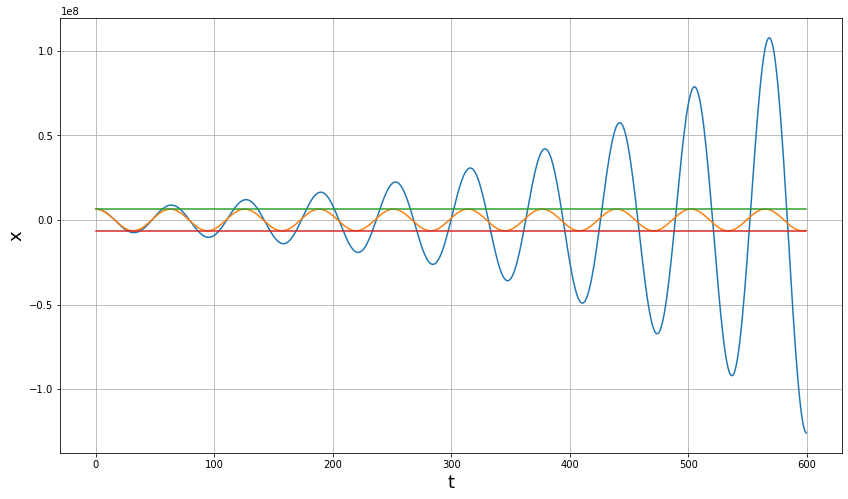

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

t = np.linspace(0, len(d_e), len(d_e))
t = t[:int(0.3*len(t))]

ax.plot(t, d_e.x[:int(len(t))])
ax.plot(t, d_h.x[:int(len(t))])
ax.plot(t, t-t+6400000)
ax.plot(t, t-t-6400000)
ax.grid(True)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x', fontsize=18)
plt.show()

При изменении координаты в методе Эйлера для каждого dt мы считаем движение равномерным и прямолинейным, а скорость меняем, как при ускоренном, вследствие чего гакапливается ошибка. 
В методе Нойна мы учитываем тот факт, что движение не является равномерным, внося поправку.

## Графики изменения удельной энергии системы с течением времени для каждого из методов

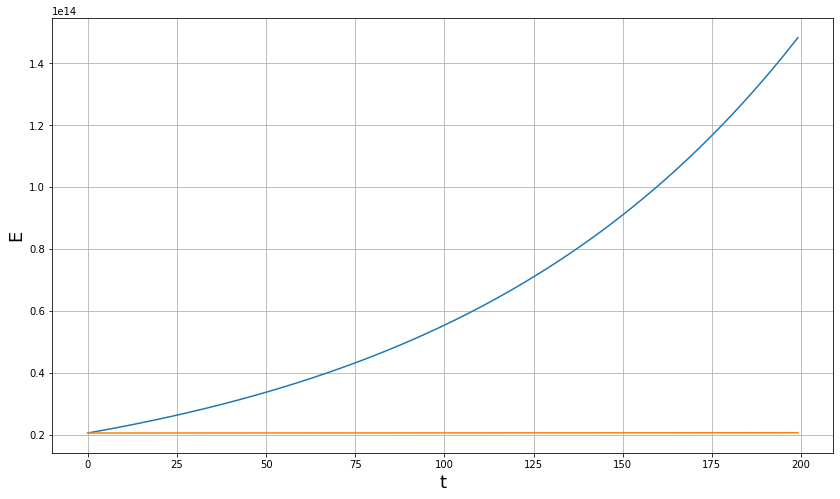

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

t = np.linspace(0, len(d_e), len(d_e))
t = t[:int(0.1*len(t))]

omega = 1
ax.plot(t, 0.5*(omega * d_e.x**2 + d_e.v**2)[:int(len(t))])
ax.plot(t, 0.5*(omega * d_h.x**2 + d_h.v**2)[:int(len(t))])
ax.grid(True)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('E', fontsize=18)
plt.show()

## Фазовые диаграммы решений

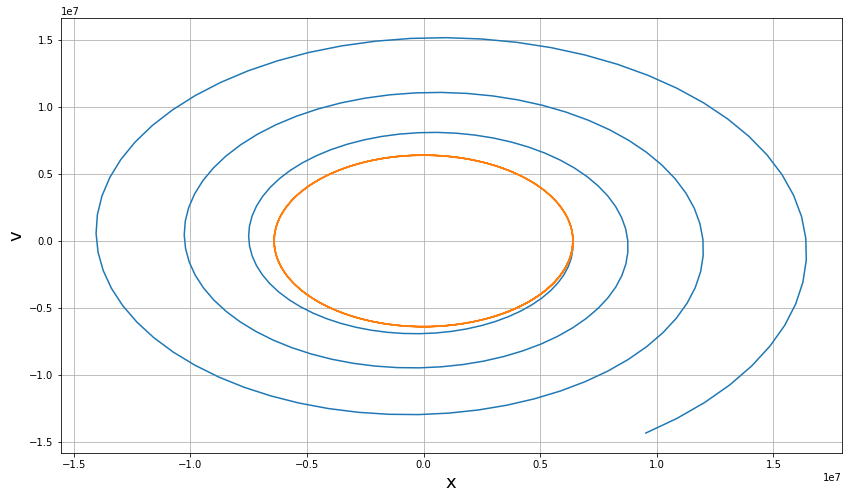

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

ax.plot(d_e.x[:int(0.1*len(d_e.x))], d_e.v[:int(0.1*len(d_e.x))])
ax.plot(d_h.x[:int(0.1*len(d_h.x))], d_h.v[:int(0.1*len(d_h.x))])
ax.grid(True)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('v', fontsize=18)
plt.show()

## Исследование точности методов

### Относительный рост амплитуды колебаний для 2 методов

In [36]:
m_e =[]
m_h=[]
t = np.linspace(0, len(d_e), len(d_e))
for i in range(len(d_e1)):
    if (d_e1['max'][i] > 0): m_e.append(np.array([t[i], d_e1['max'][i]], dtype='float'))
t = np.linspace(0, len(d_h1), len(d_h1))
for i in range(len(d_h1)):
    if (d_h1['max'][i] > 0): m_h.append(np.array([t[i], d_h1['max'][i]], dtype='float'))
m_e = np.array(m_e, dtype='float')
m_h = np.array(m_h, dtype='float')

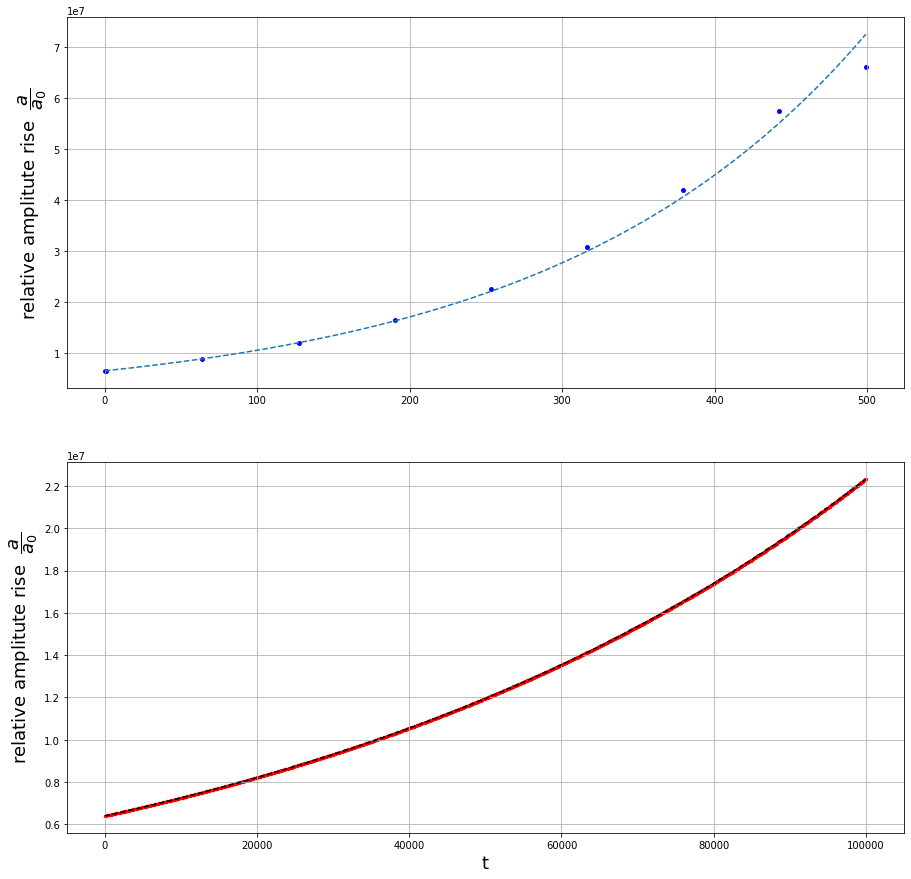

In [37]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 15)

#t = t[:int(0.1*len(t))]


p_h = np.polyfit(m_h[:,0], np.log(m_h[:,1]), deg=1)
f_h = np.poly1d(p_h)
th = np.linspace(0, max(m_h[:,0]), len(d_h))
ax[1].plot(th, np.exp(f_h(th)), '--', zorder=2, c='black')

ax[0].scatter(m_e[:,0], m_e[:,1], c='blue', marker='o', label='Euler', s=15)
ax[1].scatter(m_h[:,0], m_h[:,1], c='red', marker='o', s=5, zorder=1)

p_e = np.polyfit(m_e[:,0], np.log(m_e[:,1]), deg=1)
f_e = np.poly1d(p_e)

te = np.linspace(0, max(m_e[:,0]), len(d_e))
ax[0].plot(te, np.exp(f_e(te)), '--')

ax[1].set_xlabel('t', fontsize=18)
ax[0].set_ylabel('relative amplitute rise $~\dfrac{a}{a_0}$', fontsize=18)
ax[1].set_ylabel('relative amplitute rise $~\dfrac{a}{a_0}$', fontsize=18)
#ax.legend(fontsize=16, loc='best')
ax[0].grid(True)
ax[1].grid(True)
plt.show()


### Зависимость параметра экспоненты от размера шага

Рассмотрим, как быстро амплитуда будет расти относительно теоретической при разных шагах.

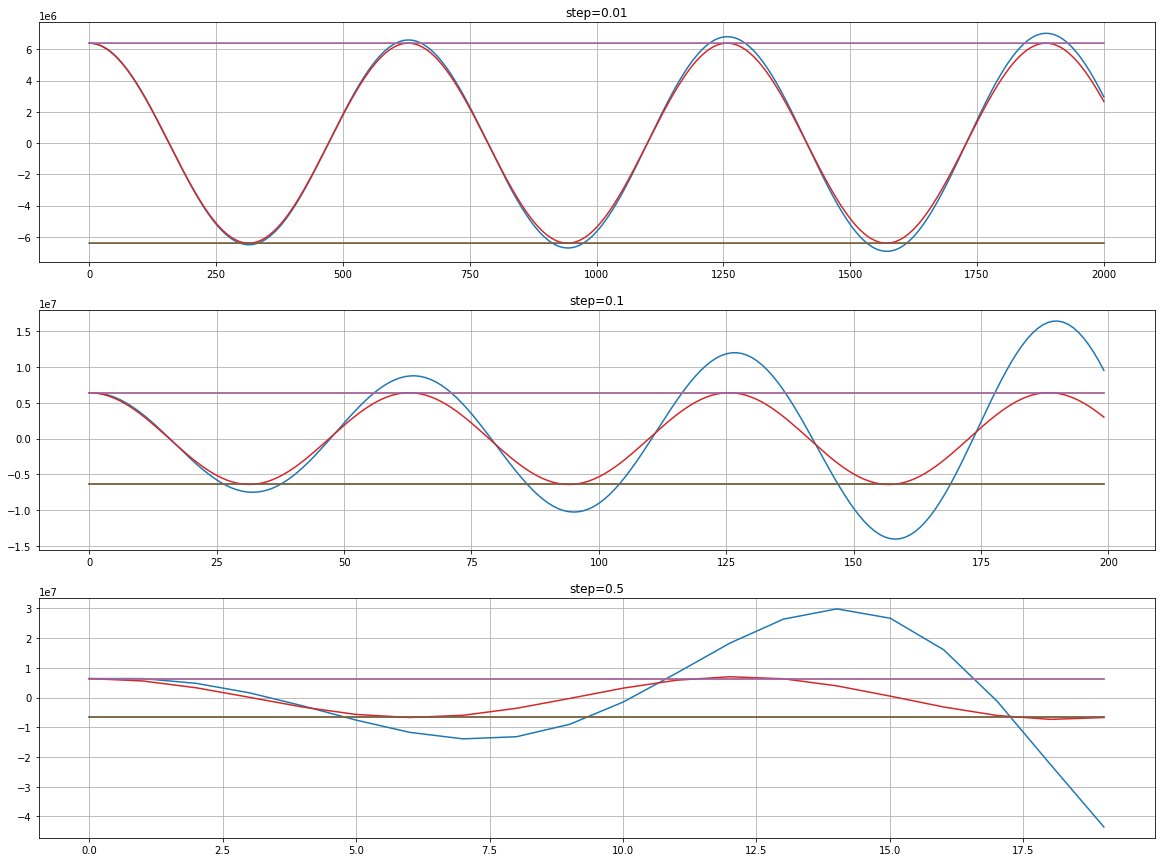

In [38]:
fig, ax = plt.subplots(3)
fig.set_size_inches(20, 15)

t0 = np.linspace(0, len(d_e), len(d_e))
t0 = t0[:int(1*len(t0))]

t = np.linspace(0, len(d_e), len(d_e))
t = t[:int(0.1*len(t))]

t3 = np.linspace(0, len(d_e), len(d_e))
t3 = t3[:int(0.01*len(t3))]

ax[0].set_title('step=0.01')
ax[0].plot(t0, d_e001.x[:int(len(t0))])
ax[0].plot(t0, t0-t0+6400000)
ax[0].plot(t0, t0-t0-6400000)

ax[1].set_title('step=0.1')
ax[1].plot(t, d_e.x[:int(len(t))])
ax[1].plot(t, t-t+6400000)
ax[1].plot(t, t-t-6400000)

ax[2].set_title('step=0.5')
ax[2].plot(t3, d_e05.x[:int(len(t3))])
ax[2].plot(t3, t3-t3+6400000)
ax[2].plot(t3, t3-t3-6400000)

ax[0].plot(t0, d_h001.x[:int(len(t0))])
ax[0].plot(t0, t0-t0+6400000)
ax[0].plot(t0, t0-t0-6400000)

ax[1].plot(t, d_h.x[:int(len(t))])
ax[1].plot(t, t-t+6400000)
ax[1].plot(t, t-t-6400000)

ax[2].plot(t3, d_h05.x[:int(len(t3))])
ax[2].plot(t3, t3-t3+6400000)
ax[2].plot(t3, t3-t3-6400000)


for i in range (0, 3):
    ax[i].grid(True)

plt.show()




Рассмотрим функцию зависимости коэффициента в экспоненте от шага для 2 методов: 

In [49]:
d_e = []
d_e.append(pd.read_csv('e6400000_0_0001_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_0005_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_001_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_002_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_003_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_004_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_005_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_006_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_007_20000.txt', sep=' '))
d_e.append(pd.read_csv('e6400000_0_008_20000.txt', sep=' '))



In [50]:
d_h = []

d_h.append(pd.read_csv('h6400000_0_001_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_002_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_003_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_004_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_005_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_006_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_007_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_008_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_009_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_01_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_02_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_03_20000.txt', sep=' '))
d_h.append(pd.read_csv('h6400000_0_04_20000.txt', sep=' '))



In [62]:
d_rg = []

d_rg.append(pd.read_csv('rg6400000_0_001_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_002_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_003_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_004_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_005_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_006_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_007_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_008_20000.txt', sep=' '))
d_rg.append(pd.read_csv('rg6400000_0_009_20000.txt', sep=' '))

In [51]:
m_e =[]
m_h=[]
a = []
t = np.linspace(0, len(d_e), len(d_e))

for i in range(len(d_h)): 
    t = np.linspace(0, len(d_h[i]), len(d_h[i]))
    for j in range(len(d_h[i])):
        if (d_h[i]['max'][j] > 0): 
            a.append(np.array([t[j], d_h[i]['max'][j]], dtype='float'))
    m_h.append(np.array(a))
    a = []

for i in range(len(d_e)): 
    t = np.linspace(0, len(d_e[i]), len(d_e[i]))
    for j in range(len(d_e[i])):
        if (d_e[i]['max'][j] > 0): 
            a.append(np.array([t[j], d_e[i]['max'][j]], dtype='float'))
    m_e.append(np.array(a))
    a = []

In [52]:
funch = []
coeffh =[]
for i in range(len(d_h)):
    funch.append(np.poly1d(np.polyfit(m_h[i][:,0], np.log(m_h[i][:,1]) ,deg=1)))
for g in funch:
    coeffh.append(g(1)-g(0))


funce = []
coeffe =[]
for i in range(len(d_e)):
    funce.append(np.poly1d(np.polyfit(m_e[i][:,0], np.log(m_e[i][:,1]) ,deg=1)))
for g in funce:
    coeffe.append(g(1)-g(0))

[ 2.02071997 -0.64634881] [ 2.72771098 -4.83410299]


Text(0, 0.5, 'coeff')

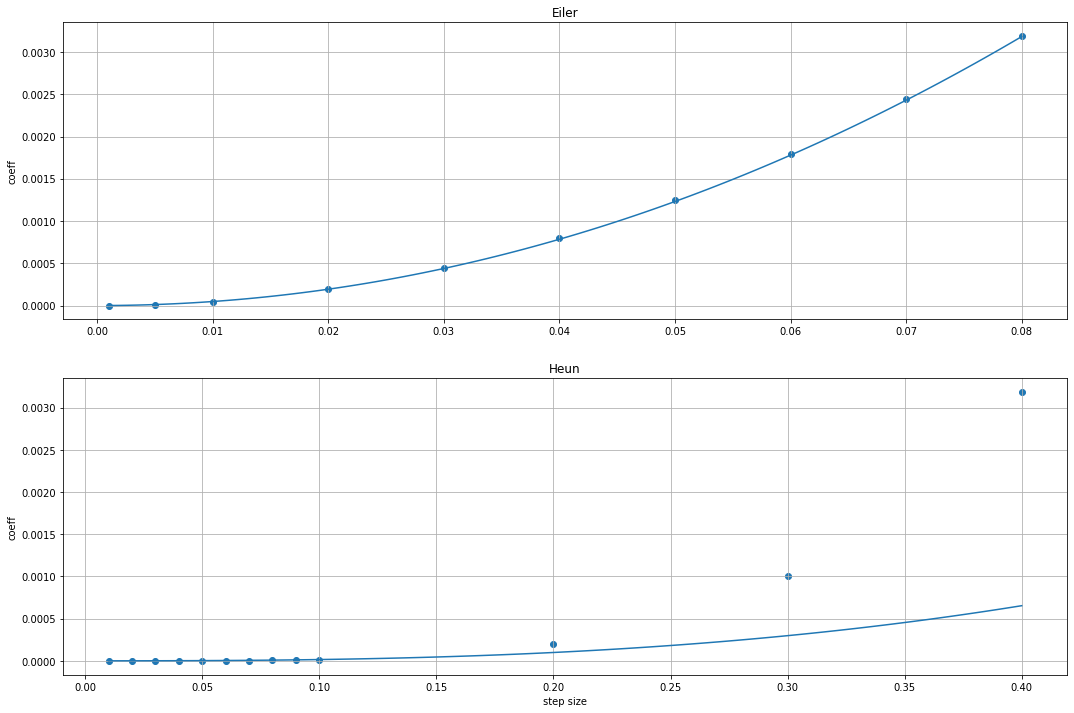

In [64]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18, 12)

a_e = []
a_h =[]
for i in range(len(d_e)):
    a_e.append(d_e[i].dt[0])

for i in range(len(d_h)):
    a_h.append(d_h[i].dt[0])

ax[0].scatter(a_e, coeffe)
ax[1].scatter(a_h, coeffh)
#ax[0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[1].set_yscale('log')
#ax[1].set_xscale('log')

p_e = np.polyfit(np.log(a_e), np.log(coeffe), deg=1)
p_h = np.polyfit(np.log(a_h), np.log(np.absolute(coeffh)), deg=1)
print(p_e, p_h)

t = np.linspace(min(a_e),max(a_e),100)
ax[0].plot(t, np.exp(np.poly1d(p_e)(np.log(t))))
t = np.linspace(min(a_h), max(a_h),100)
ax[1].plot(t, np.exp(np.poly1d(p_h)(np.log(t))))

ax[0].grid(True)
ax[0].set_title('Eiler')
ax[0].set_ylabel('coeff')
ax[1].grid(True)
ax[1].set_title('Heun')
ax[1].set_xlabel('step size')
ax[1].set_ylabel('coeff')


Таким образом, для небольших значений шага, при которых методы работают достаточно кореектно (траектории маятника гладкие), метод Хойна более точный. С определенного значения Хойн начнет накапливать большую ошибку, однако при таком шаге использовать методы не имеет смысла.

# Метод Рунге-Кутта

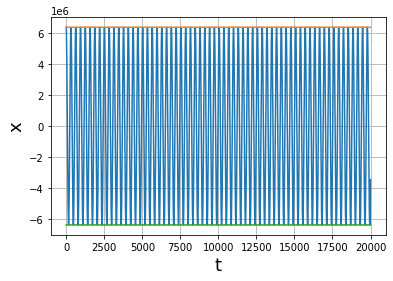

In [76]:
ig, ax = plt.subplots()
fig.set_size_inches(20, 18)

t = np.linspace(0, len(d_rg[1]), len(d_rg[1]))
t = t[:int(1*len(t))]

ax.plot(t, d_rg[1].x[:int(len(t))])
ax.plot(t, t-t+6400000)
ax.plot(t, t-t-6400000)
ax.grid(True)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x', fontsize=18)
plt.show()

# Анализ ошибки полной механической энергии

Text(0, 0.5, 'E')

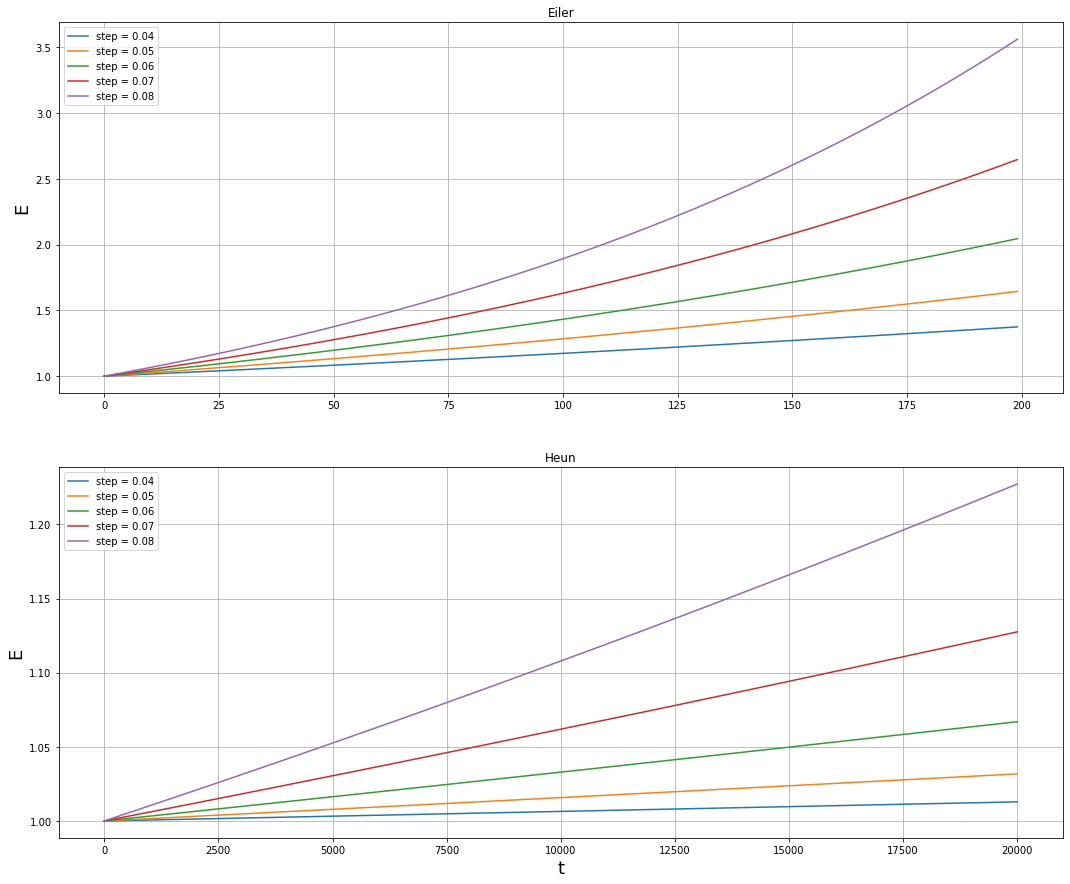

In [44]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18, 15)

for i in range(5, len(d_e)):
    t = np.linspace(0, len(d_e[i]), len(d_e[i]))
    t = t[:int(0.01*len(t))]
    ax[0].plot(t, ((omega * d_e[i].x**2 + d_e[i].v**2)/(omega * d_e[i].x[0]**2)) [:len(t)])

for i in range(3, 8):
    t = np.linspace(0, len(d_h[i]), len(d_h[i]))
    t = t[:int(1*len(t))]
    ax[1].plot(t, ((omega * d_h[i].x**2 + d_h[i].v**2)/(omega * d_h[i].x[0]**2)) [:len(t)])

ax[0].grid(True)
ax[0].set_title('Eiler')
ax[0].legend(['step = 0.04', 'step = 0.05', 'step = 0.06', 'step = 0.07', 'step = 0.08'])
ax[1].grid(True)
ax[1].set_title('Heun')
ax[1].legend(['step = 0.04', 'step = 0.05', 'step = 0.06', 'step = 0.07', 'step = 0.08'])


ax[0].set_ylabel('E', fontsize=18)
ax[1].set_xlabel('t', fontsize=18)
ax[1].set_ylabel('E', fontsize=18)

Как видно из графиков, оба метода накапливают ошибку экспоненчиально, причем ее скорость роста монотонно возрастает с ростом размера шага.

In [66]:
e_e = []
e_h = []
e_rg = []
a = []
t = np.linspace(0, len(d_e), len(d_e))

for i in range(len(d_e)): 
    t = np.linspace(0, len(d_e[i]), len(d_e[i]))
    for j in range(len(d_e[i])): 
        a.append(np.array([t[j], (omega*d_e[i].x[j]**2 + d_e[i].v[j]**2)], dtype='float'))
    e_e.append(np.array(a))
    a = []

for i in range(len(d_h)): 
    t = np.linspace(0, len(d_h[i]), len(d_h[i]))
    for j in range(len(d_h[i])):
        a.append(np.array([t[j], (omega*d_h[i].x[j]**2 + d_h[i].v[j]**2)], dtype='float'))
    e_h.append(np.array(a))
    a = []

for i in range(len(d_rg)): 
    t = np.linspace(0, len(d_rg[i]), len(d_rg[i]))
    for j in range(len(d_rg[i])):
        a.append(np.array([t[j], (omega*d_rg[i].x[j]**2 + d_rg[i].v[j]**2)], dtype='float'))
    e_rg.append(np.array(a))
    a = []

In [67]:
funch = []
e_coeffh =[]
for i in range(len(e_h)):
    funch.append(np.poly1d(np.polyfit(e_h[i][:,0], np.log(e_h[i][:,1]) ,deg=1)))
for g in funch:
    e_coeffh.append(g(1)-g(0))


funce = []
e_coeffe =[]
for i in range(len(e_e)):
    funce.append(np.poly1d(np.polyfit(e_e[i][:,0], np.log(e_e[i][:,1]) ,deg=1)))
for g in funce:
    e_coeffe.append(g(1)-g(0))

funcrg = []
e_coeffrg =[]
for i in range(len(e_rg)):
    funcrg.append(np.poly1d(np.polyfit(e_rg[i][:,0], np.log(e_rg[i][:,1]) ,deg=1)))
for g in funcrg:
    e_coeffrg.append(g(1)-g(0))

[ 1.99939492 -0.00339563] [ 3.99951037 -1.38802804] [ 4.76623761 -7.78305629]


Text(0.5, 0, 'step size')

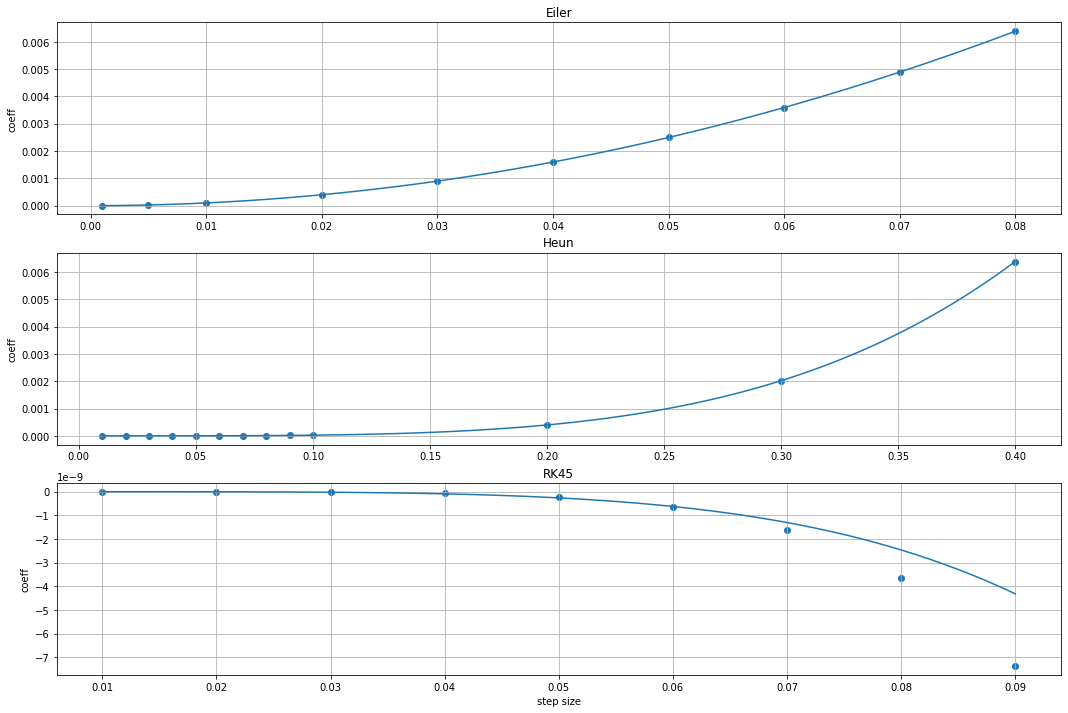

In [80]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(18, 12)

a_e = []
a_h =[]
a_rg = []

for i in range(len(d_e)):
    a_e.append(d_e[i].dt[0])

for i in range(len(d_h)):
    a_h.append(d_h[i].dt[0])

for i in range(len(d_rg)):
    a_rg.append(d_rg[i].dt[0])

ax[2].scatter(a_rg, e_coeffrg)
ax[1].scatter(a_h, e_coeffh)
ax[0].scatter(a_e, e_coeffe)

#ax[0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[1].set_yscale('log')
#ax[1].set_xscale('log')

p_rg = np.polyfit(np.log(a_rg), np.log(np.absolute(e_coeffrg)), deg=1)
p_e = np.polyfit(np.log(a_e), np.log(e_coeffe), deg=1)
p_h = np.polyfit(np.log(a_h), np.log(e_coeffh), deg=1)
print(p_e, p_h, p_rg)

t = np.linspace(min(a_e),max(a_e),100)
ax[0].plot(t, np.exp(np.poly1d(p_e)(np.log(t))))
t = np.linspace(min(a_h), max(a_h),100)
ax[1].plot(t, np.exp(np.poly1d(p_h)(np.log(t))))
t = np.linspace(min(a_rg), max(a_rg),100)
ax[2].plot(t, -np.exp(np.poly1d(p_rg)(np.log(t))))

ax[0].grid(True)
ax[0].set_title('Eiler')
ax[0].set_ylabel('coeff')

ax[1].grid(True)
ax[1].set_title('Heun')
ax[1].set_ylabel('coeff')

ax[2].grid(True)
ax[2].set_title('RK45')
ax[2].set_ylabel('coeff')
ax[2].set_xlabel('step size')


Так же, как и в случае с амплитудой, для допустимых значений метод Хойна более оптимален, насмотря на большую скорость роста. 

В методе Рунге-Кутта энергия не растет, а уменьшается. Этот метод заметно более точен, чем метод Эйлера и хойна, т.к. учитывает большую поправку. Он более оптимален на всем диапазоне исследуевых величин шагов.

# Обратимость времени

In [ ]:
d_e = pd.read_csv('e6400000_0_01_200.txt', sep=' ')
d_e_back = pd.read_csv('e6400000_0_-01_200.txt', sep=' ')
d_h = pd.read_csv('h6400000_0_01_2000.txt', sep=' ')
d_h_back = pd.read_csv('h6400000_0_-01_2000.txt', sep=' ')

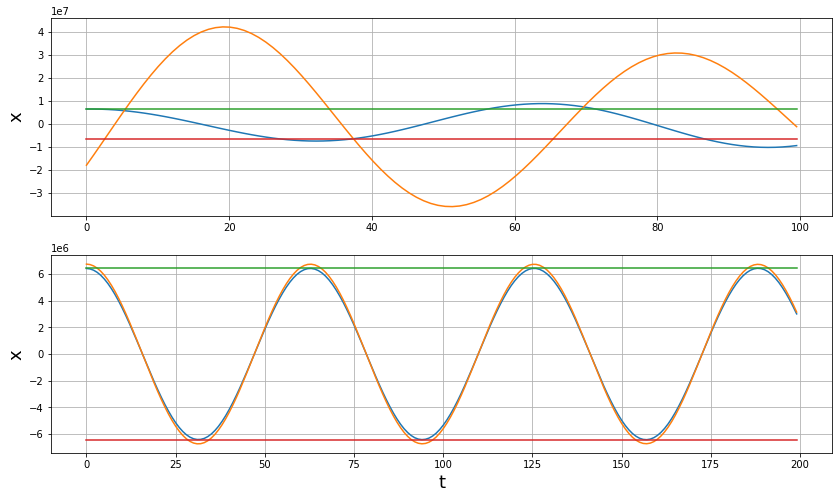

In [ ]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(14, 8)

te = np.linspace(0, len(d_e), len(d_e))
te = te[:int(0.5*len(te))]

th = np.linspace(0, len(d_h), len(d_h))
th = th[:int(0.1*len(th))]

ax[0].plot(te, d_e.x[:int(len(te))])
ax[0].plot(te, d_e_back.x[-1:len(d_e_back)-int(len(te))-1:-1])
ax[1].plot(th, d_h.x[:int(len(th))])
ax[1].plot(th, d_h_back.x[-1:len(d_h_back)-int(len(th))-1:-1])
ax[0].plot(te, te-te+6400000)
ax[0].plot(te, te-te-6400000)
ax[1].plot(th, th-th+6400000)
ax[1].plot(th, th-th-6400000)
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_xlabel('t', fontsize=18)
ax[0].set_ylabel('x', fontsize=18)
ax[1].set_ylabel('x', fontsize=18)
plt.show()

In [ ]:
config = {'entries' : []}

for i in np.linspace(1e-4, 1e-3, 2):
    config['entries'].append({
        'model' : 'Euler',
        'omega' : 1,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'number of steps' : 1000,
        'step of modeling' : i,
        'file name' : 'Euler_1_6400000_0_'+str(1000)+'_'+str(i)+'.txt'
    })

In [ ]:
write = open('config_file.json', 'w')
json.dump(config, write, indent=4)
write.close()